## 統計學習與深度學習 (Fall, 2021) Homework 1

In [1]:
import pickle
from sklearn import preprocessing
import numpy as np
import math
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
def load_data(doscaling):
    with open('msd_data1.pickle', 'rb') as fh1:
        msd_data = pickle.load(fh1)
    if (doscaling == 1):
        xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
        #standardize feature values
        X_train = xscaler.transform(msd_data['X_train'])
        X_test = xscaler.transform(msd_data['X_test'])
    else:
        X_train = msd_data['X_train']
        X_test = msd_data['X_test']

    Y_train = msd_data['Y_train']
    Y_test = msd_data['Y_test']
    
    return X_train, X_test, Y_train, Y_test

### 第一題 [myknn_regressor]
#### Q1.1 Create your myknn_regressor based on the skeleton.

In [2]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        ### Add your code here ###
        self.k=n_neighbors
        self.X_train=None
        self.Y_train=None
        
        if(mean_type=="equal_weight"):
            self.mean_type=1
        elif(mean_type=="remove_outliers"):
            self.mean_type=2
        else:
            print("WRONG MEAN TYPE! The mean type was set to 'equal_weight' ")
            self.mean_type=1

    def fit(self, x_train, y_train):
        ### Add your code here ###
        self.X_train=x_train
        self.Y_train=y_train
         

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
         ### Add your code here ###
        y_prediction=np.zeros(len(x_test))
        
        if (self.k>=10) and (self.mean_type==2):
            ## remove_outlier
            print("Mean Type: Remove Outlier")
            for i in range(len(x_test)):
                distance=np.empty(len(self.X_train))
                for j in range(len(self.X_train)):
                    distance[j]=math.sqrt(np.sum((x_test[i]-self.X_train[j])**2))
                distance_sort=np.argsort(distance)
                topK_Y=self.Y_train[distance_sort[0:self.k]]
                Q1=np.quantile(topK_Y,0.25)
                Q2=np.quantile(topK_Y,0.50)
                Q3=np.quantile(topK_Y,0.75)
                IQR=Q3-Q1
                topK_Y_removed=topK_Y[topK_Y>=Q1-1.5*IQR]
                topK_Y_removed=topK_Y_removed[topK_Y_removed<=Q3+1.5*IQR]
                y_prediction[i]=np.mean(topK_Y_removed)
                
        else:
            ## equal_weight
            print("Mean Type: Equal Weight")
            for i in range(len(x_test)):
                distance=np.empty(len(self.X_train))
                for j in range(len(self.X_train)):
                    distance[j]=math.sqrt(np.sum((x_test[i]-self.X_train[j])**2))
                distance_sort=np.argsort(distance)
                topK_Y=self.Y_train[distance_sort[0:self.k]]
                y_prediction[i]=np.mean(topK_Y)
                
        return y_prediction
    
    def CalRMSE(self, y_pred, y_true):
        MSE=np.mean((y_true-y_pred)**2)
        RMSE=math.sqrt(MSE)
        return MSE,RMSE

#### Q1.2 Load data from msd_data1.pickle. You should standardize all feature values to have a zero mean and unit variance before training a KNN model.  Make predictions using $k=20$ and "equal_weight" $f$. List the RMSE and the first 20 predictions in the test data. 

In [3]:
X_train, X_test, Y_train, Y_test=load_data(1)

# Equal Weight 
myknn_equal = myknn_regressor(20, "equal_weight")
myknn_equal.fit(X_train, Y_train)
ypred_equal = myknn_equal.predict(X_test)
mse_equal,rmse_equal=myknn_equal.CalRMSE(ypred_equal,Y_test)

print("First 20 predictions(equal_weight):\n",ypred_equal[0:20])
print("RMSE(equal_weight):",rmse_equal)

Mean Type: Equal Weight
First 20 predictions(equal_weight):
 [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]
RMSE(equal_weight): 10.25126451549596


#### Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance.  Make predictions using $k=20$ and "remove_outier" $f$. List the RMSE and the first 20 predictions in the testing data. 

In [4]:
X_train, X_test, Y_train, Y_test=load_data(1)

# Remove Outlier 
myknn_remove = myknn_regressor(20, "remove_outliers")
myknn_remove.fit(X_train, Y_train)
ypred_remove = myknn_remove.predict(X_test)
mse_remove,rmse_remove=myknn_remove.CalRMSE(ypred_remove,Y_test)

print("First 20 predictions(remove_outlier):\n",ypred_remove[0:20])
print("RMSE(remove_outlier):",rmse_remove)

Mean Type: Remove Outlier
First 20 predictions(remove_outlier):
 [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]
RMSE(remove_outlier): 10.212572466080376


### 第二題 [Tuning the Hyper-parameter]

In [5]:
from sklearn.neighbors import KNeighborsRegressor
grid_search=np.array([1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200])

In [6]:
# First Case
X_train, X_test, Y_train, Y_test=load_data(1)
#print(X_train[0])
rmse_value_first=[]

for i in range(len(grid_search)):
    knn = KNeighborsRegressor(n_neighbors=grid_search[i])
    knn.fit(X_train, Y_train)
    y_pred=knn.predict(X_test)
    mse=np.mean((Y_test-y_pred)**2)
    rmse=math.sqrt(mse)
#     print("K=",grid_search[i]," RMSE:",rmse)
    rmse_value_first.append(rmse)

print("RMSE\n",rmse_value_first)

RMSE
 [13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.425998912973919, 10.318171959828572, 10.25126451549596, 10.23762722509469, 10.215977156359507, 10.205243203546763, 10.204332770527754, 10.207243171822855, 10.206033712139762, 10.208862384446808, 10.21700262724764, 10.231954198429056, 10.247295947386965, 10.264908458982783, 10.287098382403647, 10.317788599090449, 10.330995620176944, 10.351940397014143]


In [7]:
# Second Case
X_train, X_test, Y_train, Y_test=load_data(2)
#print(X_train[0])
rmse_value_second=[]

for i in range(len(grid_search)):
    knn = KNeighborsRegressor(n_neighbors=grid_search[i])
    knn.fit(X_train, Y_train)
    y_pred=knn.predict(X_test)
    mse=np.mean((Y_test-y_pred)**2)
    rmse=math.sqrt(mse)
#     print("K=",grid_search[i]," RMSE:",rmse)
    rmse_value_second.append(rmse)

print("RMSE\n",rmse_value_second)

RMSE
 [14.923638966418345, 12.777499755429464, 12.075674967716129, 11.767805657810635, 11.466392632384432, 11.07746090040493, 10.888979137947995, 10.797788546734928, 10.79007301797969, 10.75026561256701, 10.717738719772289, 10.714437504678756, 10.698494013475852, 10.69110105960404, 10.682608734124413, 10.672535729098724, 10.662907517124493, 10.67701950452466, 10.683139638996407, 10.687017556442052, 10.691630026202155, 10.69071978380711, 10.698853374700175]


In [8]:
# Third Case
X_train, X_test, Y_train, Y_test=load_data(1)
#print(X_train[0])
rmse_value_third=[]

for i in range(len(grid_search)):
    myknn_remove = myknn_regressor(grid_search[i], "remove_outliers")
    myknn_remove.fit(X_train, Y_train)
    ypred_remove=myknn_remove.predict(X_test)
    mse_remove,rmse_remove=myknn_remove.CalRMSE(ypred_remove,Y_test)
#     print("K=",grid_search[i]," RMSE:",rmse_remove)
    rmse_value_third.append(rmse_remove)

print("RMSE\n",rmse_value_third)

Mean Type: Equal Weight
Mean Type: Equal Weight
Mean Type: Equal Weight
Mean Type: Equal Weight
Mean Type: Equal Weight
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
Mean Type: Remove Outlier
RMSE
 [13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.468549209697088, 10.293424167991525, 10.212572466080376, 10.19147537897133, 10.132105705172414, 10.109608004792985, 10.093231539122922, 10.080018891479627, 10.08078333324933, 10.059767600751963, 10.073857809066583, 10.063683549276588, 10.064917276737452, 10.067237203620246, 10.090646192390137, 10.115316

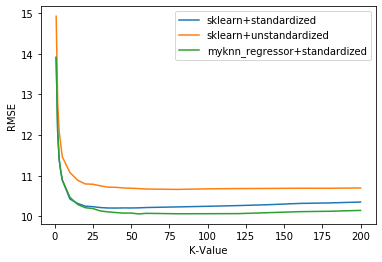

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(grid_search,rmse_value_first,label='sklearn+standardized')
plt.plot(grid_search,rmse_value_second,label='sklearn+unstandardized')
plt.plot(grid_search,rmse_value_third,label='myknn_regressor+standardized')
plt.ylabel("RMSE")
plt.xlabel("K-Value")
plt.legend()

plt.show()

說明：
1. 比較standardized與unstandardized的資料，發現standardized的資料在RMSE的表現會比較好，推測有經過standardize的步驟可以讓各feature有相同的尺度，使最終表現較好
2. 不論是哪一種資料，K值從0開始增大，RMSE也隨著變小，直到K值大約落在25至60這區間時，RMSE表現最小，接著K值再增大則是會讓RMSE跟著增大。因此，取K值預測時應該取在25至60這區間左右。

### 第三題 [Lasso Regression]

#### Q3.1 基於本題給的$L$，推導新的Coordinate Descent with Soft Thresholding公式

原式：  
$L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [\sum_{j=1}^{M} |w_j|]$  
  
  
推導結果：  
$\hspace{0.5cm}$對於 $w_0$:   
$\hspace{0.5cm}$$\hspace{0.5cm}$$ w_0 = \frac{\sum_{i=1}^{n} \hspace{0.1cm} (y_i - \mathbf{w}^T \mathbf{x}_i)}{n} $
  
$\hspace{0.5cm}$對於 $\mathbf{w}_0 $ 以外的feature weight:   
$\hspace{0.5cm}$$\hspace{0.5cm}$令 $ \mathbf{w\star}_j = \frac{\sum_{i=1}^n \hspace{0.1cm}(y_i - \mathbf{w}^T_{-j} \hspace{0.1cm} \mathbf{x}_{i,-j} \hspace{0.2cm} - \hspace{0.1cm}w_0 \hspace{0.1cm} )(\mathbf{x}_{i,j}\hspace{0.1cm})}{\sum_{i=1}^n \mathbf{x}_{ij}^2} $  

$\hspace{0.5cm}$$\hspace{0.5cm}$如果 $ \mathbf{w\star}_j  - \frac{n\lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2} > 0 $，則 $ \mathbf{w}_j = \mathbf{w\star}_j  - \frac{n\lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2} $  
$\hspace{0.5cm}$$\hspace{0.5cm}$如果 $ \mathbf{w\star}_j  + \frac{n\lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2} < 0 $，則 $ \mathbf{w}_j = \mathbf{w\star}_j  + \frac{n\lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2} $  
$\hspace{0.5cm}$$\hspace{0.5cm}$Otherewise，則為0

#### Q3.2 使用給定個骨架建構你的mylasso

In [10]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef=lamcoef
        self.max_iter=max_iter
        self.tol=tol
        self.const_regu=False
        self.X_train=None
        self.Y_train=None
        self.weight=None
        self.training_loss=None
        self.const_regu=const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        
        x_train=np.c_[np.ones(len(x_train)),x_train]
        
        self.X_train=x_train
        self.Y_train=y_train
        lamcoef=self.lamcoef
        
        n,m=self.X_train.shape
            
        
        if winit=='linear': # linear regression weights as initial weights
            w_lin=np.dot(np.dot(np.linalg.inv(np.dot(self.X_train.T,self.X_train)),self.X_train.T),self.Y_train)
            w_current=w_lin.copy()
        else: # ridge regression weights as initial weights
            I=np.identity(m)
            w_ridge=np.dot(np.dot(np.linalg.inv(np.dot(self.X_train.T, self.X_train) + lamcoef * I), self.X_train.T), self.Y_train)
            w_current=w_ridge.copy()
        
        w_small=w_current.copy()
        
        tmp_dif=self.Y_train-np.dot(w_current,self.X_train.T)
        
        if self.const_regu:  # L'
            last_loss=np.dot(tmp_dif,tmp_dif.T)/(2*n)+lamcoef*np.sum(np.absolute(w_current))
        else:  # L
            last_loss=np.dot(tmp_dif,tmp_dif.T)/(2*n)+lamcoef*np.sum(np.absolute(w_current[1:]))
        loss_small=last_loss
        count=0
        while(count<self.max_iter):
            
            if self.const_regu: # L'
                for j in range(len(w_current)):
                    deletedX=np.delete(self.X_train,j,axis=1)
                    deletedW=np.delete(w_current,j,axis=0)    
                    
                    if j==0:
                        Wj_Star=np.sum(self.Y_train-np.dot(deletedW,deletedX.T))/n
                        if Wj_Star-lamcoef > 0:
                            w_current[j]=Wj_Star-lamcoef
                        elif Wj_Star+lamcoef < 0:
                            w_current[j]=Wj_Star+lamcoef
                        else:
                            w_current[j]=0
                            
                    else:
                        Wj_Star=np.dot(self.Y_train-np.dot(deletedW,deletedX.T),self.X_train[:,j])/(np.dot(self.X_train[:,j],self.X_train[:,j].T))
                        if Wj_Star-(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T))) > 0:
                            w_current[j]=Wj_Star-(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T)))
                        elif Wj_Star+(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T))) < 0:
                            w_current[j]=Wj_Star+(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T)))
                        else:
                            w_current[j]=0
            else: # L
                for j in range(len(w_current)):
                    deletedX=np.delete(self.X_train,j,axis=1)
                    deletedW=np.delete(w_current,j,axis=0)  
                    
                    if j==0:
                        w_current[j]=np.sum(self.Y_train-np.dot(deletedW,deletedX.T))/n
                    else:
                        Wj_Star=np.dot(self.Y_train-np.dot(deletedW,deletedX.T),self.X_train[:,j])/(np.dot(self.X_train[:,j],self.X_train[:,j].T))
                        if Wj_Star-(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T))) > 0:
                            w_current[j]=Wj_Star-(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T)))
                        elif Wj_Star+(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T))) < 0:
                            w_current[j]=Wj_Star+(n*lamcoef/(np.dot(self.X_train[:,j],self.X_train[:,j].T)))
                        else:
                            w_current[j]=0

            tmp_dif=self.Y_train-np.dot(w_current,self.X_train.T)
            if self.const_regu: # L'
                cur_loss=np.dot(tmp_dif,tmp_dif.T)/(2*n)+lamcoef*np.sum(np.absolute(w_current))
            else: # L
                cur_loss=np.dot(tmp_dif,tmp_dif.T)/(2*n)+lamcoef*np.sum(np.absolute(w_current[1:]))
#             print("SMALL",loss_small,"CUR",cur_loss)

            loss_difference=abs(cur_loss-last_loss)
            last_loss=cur_loss
            
            if cur_loss<loss_small:
                loss_small=cur_loss
                w_small=w_current.copy()
            
            if loss_difference<self.tol:
                break;

            count=count+1
        
        self.weight=w_small
        self.training_loss=loss_small
        
        if (verbose):
            print("Number of Iterations:",count)
            print("Intercept:",self.weight[0])
            print("Weight (Exclude Intercept): \n",self.weight[1:])
            print("Training Loss:",loss_small)
            print("Number of Non-zero Weights:",np.count_nonzero(self.weight[1:]))
        
        if (not keep_traindata):
            self.X_train=None
            self.Y_train=None
        
        
    def predict(self, x_test):
        """Make prediction using trained model"""
        ### Add your code here ###
        x_test=np.c_[np.ones(len(x_test)),x_test]
        y_pred=np.dot(self.weight,x_test.T)
        return y_pred
    
    def CalRMSE(self, y_pred, y_true):
        MSE=np.mean((y_true-y_pred)**2)
        RMSE=math.sqrt(MSE)
        return RMSE
    
    def CalMAE(self, y_pred, y_true):
        return np.mean(np.absolute(y_true-y_pred))
    

#### Q3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數。為了讓結果容易閱讀，請使用`np.set_printoptions(suppress=True)`關閉Scientific Notation。

In [11]:
X_train, X_test, Y_train, Y_test=load_data(1)

mlo=mylasso(lamcoef=0.1)
mlo.fit(X_train, Y_train)

ypred_train=mlo.predict(X_train)
rmse_train=mlo.CalRMSE(ypred_train,Y_train)
mae_train=mlo.CalMAE(ypred_train,Y_train)

print("Training Loss:",mlo.training_loss)
print("RMSE in Training Data:",rmse_train)
print("MAE in Training Data:",mae_train)
print("Intercept:",mlo.weight[0])
print("Feature Weights: \n",mlo.weight[1:])
print("Number of Non-zero Feature Weights:",np.count_nonzero(mlo.weight[1:]))

Training Loss: 49.88840410995367
RMSE in Training Data: 9.71949908908463
MAE in Training Data: 6.980898009625433
Intercept: 1998.266
Feature Weights: 
 [ 4.6518551  -2.45673153 -1.06195885  0.         -0.34275054 -2.94854329
  0.         -0.39970268 -0.42653866  0.         -0.23498651 -0.39491058
  0.50307719  0.         -0.34207893  0.61674589  0.15722753  0.43489925
  0.43595375  1.12941661  0.40663481  0.          1.77743607  0.
 -0.16842728  0.07833529  0.66391172  0.01297938  0.15350723  0.
 -0.21762074 -0.22189107  0.         -0.0027548  -0.01707674 -0.2599464
  0.          0.28969362  0.34893387  0.         -0.26112569 -0.14488702
 -0.00995271  0.03497723 -0.03984338  0.          0.00299383 -0.17804306
  0.          0.06494382  0.27076506  0.          0.          0.
  0.          0.         -0.63813223  0.23761428 -0.19016387  0.
 -0.18875525  0.         -0.13590668  0.0612754  -0.26619017  0.
  0.          0.         -0.03099184  0.         -0.19276517  0.01221358
  0.20735199 

#### Q3.4 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。

In [12]:
ypred_test = mlo.predict(X_test)
rmse_test=mlo.CalRMSE(ypred_test,Y_test)
mae_test=mlo.CalMAE(ypred_test,Y_test)

print("First five predictions:", ypred_test[:5])
print("Test RMSE", rmse_test)
print("Test MAE", mae_test)

First five predictions: [1991.93191145 1999.07198637 2001.76293602 1991.30317029 1994.42657933]
Test RMSE 9.648414790970712
Test MAE 6.9213859614967586


#### Q3.5 使用下面的$\lambda$訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個$\lambda$的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。

In [13]:
search=np.array([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2])

training_loss=[]
num_nonzero=[]
avg_weightsize=[]
training_rmse=[]
test_rmse=[]

for i in range(len(search)):
    print("lamcoef:",search[i])
    mlo=mylasso(lamcoef=search[i])
    mlo.fit(X_train, Y_train)
    training_loss.append(mlo.training_loss)
    num_nonzero.append(np.count_nonzero(mlo.weight[1:]))
    avg_weightsize.append(np.mean(np.absolute(mlo.weight[1:])))
    ypred_train=mlo.predict(X_train)
    training_rmse.append(mlo.CalRMSE(ypred_train,Y_train))
    ypred_test = mlo.predict(X_test)
    test_rmse.append(mlo.CalRMSE(ypred_test,Y_test))

lamcoef: 0.0001
lamcoef: 0.0005
lamcoef: 0.001
lamcoef: 0.005
lamcoef: 0.01
lamcoef: 0.05
lamcoef: 0.1
lamcoef: 0.5
lamcoef: 1.0
lamcoef: 2.0


Training Loss:
 [46.570461058906474, 46.5873788167258, 46.608460499968, 46.774656529614944, 46.97682568040409, 48.417389889743944, 49.88840410995367, 56.375688203274606, 59.889323719176424, 61.492131277099155]


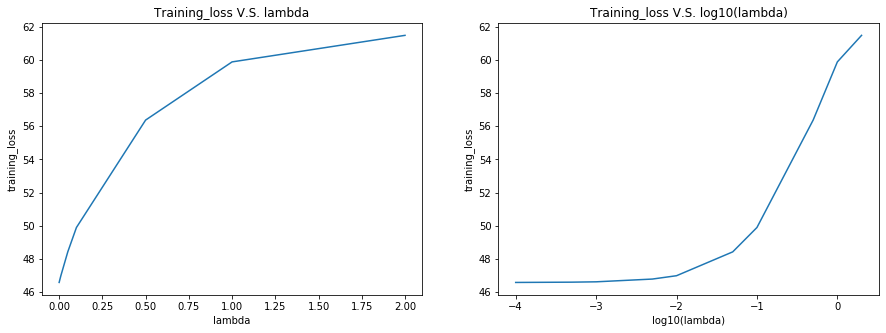

In [14]:
print("Training Loss:\n",training_loss)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(search,training_loss)
plt.title('Training_loss V.S. lambda')
plt.ylabel('training_loss')
plt.xlabel('lambda')

plt.subplot(1,2,2)
plt.plot(np.log10(search),training_loss)
plt.title('Training_loss V.S. log10(lambda)')
plt.ylabel('training_loss')
plt.xlabel('log10(lambda)')

plt.show()

Number of Nonzero Weights:
 [90, 90, 90, 89, 87, 76, 59, 16, 4, 1]


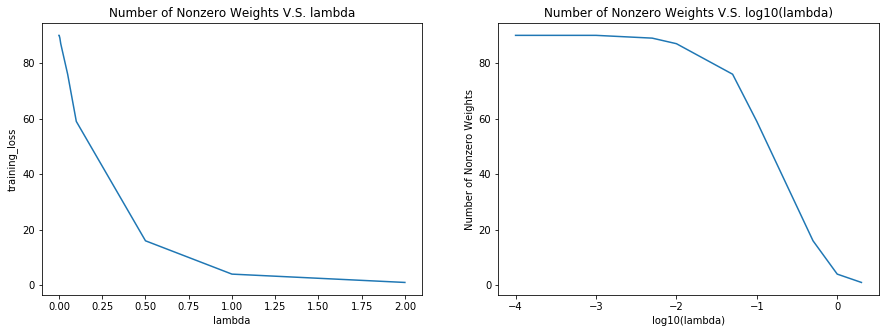

In [15]:
print("Number of Nonzero Weights:\n",num_nonzero)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(search,num_nonzero)
plt.title('Number of Nonzero Weights V.S. lambda')
plt.ylabel('training_loss')
plt.xlabel('lambda')

plt.subplot(1,2,2)
plt.plot(np.log10(search),num_nonzero)
plt.title('Number of Nonzero Weights V.S. log10(lambda)')
plt.ylabel('Number of Nonzero Weights')
plt.xlabel('log10(lambda)')

plt.show()

Average Weight Size:
 [0.47065589275525677, 0.46950701556708546, 0.4679055680695399, 0.4557537198978956, 0.4429033229265547, 0.36397711030207547, 0.29489698206613213, 0.12003118917964033, 0.04217496765973307, 0.004265587910527286]


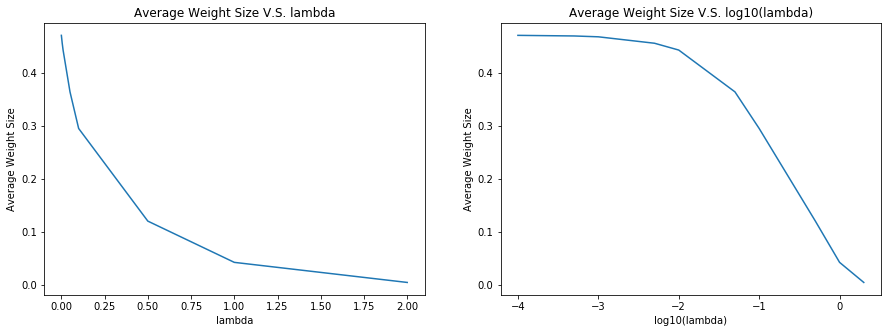

In [16]:
print("Average Weight Size:\n",avg_weightsize)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(search,avg_weightsize)
plt.title('Average Weight Size V.S. lambda')
plt.ylabel('Average Weight Size')
plt.xlabel('lambda')

plt.subplot(1,2,2)
plt.plot(np.log10(search),avg_weightsize)
plt.title('Average Weight Size V.S. log10(lambda)')
plt.ylabel('Average Weight Size')
plt.xlabel('log10(lambda)')

plt.show()

Training RMSE:
 [9.650515546422552, 9.650518224533364, 9.650528379196835, 9.650861863653514, 9.651757631620283, 9.672589404434019, 9.71949908908463, 10.096958422236945, 10.591843713896125, 11.02037435418636]


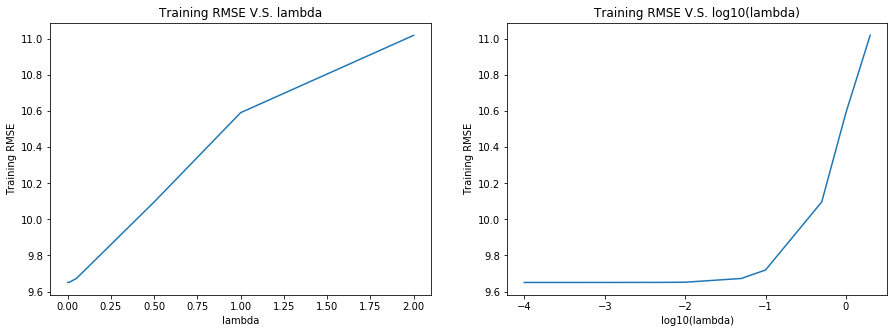

In [17]:
print("Training RMSE:\n",training_rmse)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(search,training_rmse)
plt.title('Training RMSE V.S. lambda')
plt.ylabel('Training RMSE')
plt.xlabel('lambda')

plt.subplot(1,2,2)
plt.plot(np.log10(search),training_rmse)
plt.title('Training RMSE V.S. log10(lambda)')
plt.ylabel('Training RMSE')
plt.xlabel('log10(lambda)')

plt.show()

Test RMSE:
 [9.644374072363343, 9.644091526385363, 9.64353855138658, 9.640063527594483, 9.63640781737698, 9.626433568849045, 9.648414790970712, 9.999130618162082, 10.474620633931153, 10.902614277773957]


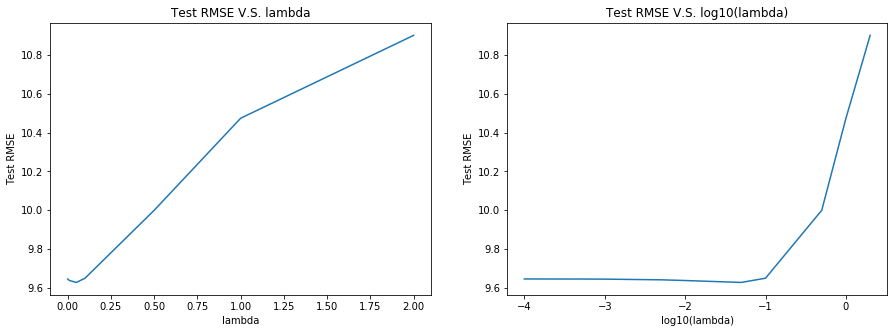

In [18]:
print("Test RMSE:\n",test_rmse)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(search,test_rmse)
plt.title('Test RMSE V.S. lambda')
plt.ylabel('Test RMSE')
plt.xlabel('lambda')

plt.subplot(1,2,2)
plt.plot(np.log10(search),test_rmse)
plt.title('Test RMSE V.S. log10(lambda)')
plt.ylabel('Test RMSE')
plt.xlabel('log10(lambda)')

plt.show()

In [19]:
import pandas as pd

indexstring=['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '1', '2']

df1=pd.DataFrame (training_loss, columns = ['training_loss'],index=indexstring)
df2=pd.DataFrame (num_nonzero, columns = ['num_nonzero'],index=indexstring)
df3=pd.DataFrame (avg_weightsize, columns = ['avg_weightsize'],index=indexstring)
df4=pd.DataFrame (training_rmse, columns = ['training_rmse'],index=indexstring)
df5=pd.DataFrame (test_rmse, columns = ['test_rmse'],index=indexstring)

df_inner=df1.merge(df2,how='inner',left_index=True,right_index=True)
df_inner=df_inner.merge(df3,how='inner',left_index=True,right_index=True)
df_inner=df_inner.merge(df4,how='inner',left_index=True,right_index=True)
df_inner=df_inner.merge(df5,how='inner',left_index=True,right_index=True)
df_inner

,training_loss,num_nonzero,avg_weightsize,training_rmse,test_rmse
0.0001,46.570461,90,0.470656,9.650516,9.644374
0.0005,46.587379,90,0.469507,9.650518,9.644092
0.001,46.608460,90,0.467906,9.650528,9.643539
0.005,46.774657,89,0.455754,9.650862,9.640064
0.01,46.976826,87,0.442903,9.651758,9.636408
0.05,48.417390,76,0.363977,9.672589,9.626434
0.1,49.888404,59,0.294897,9.719499,9.648415
0.5,56.375688,16,0.120031,10.096958,9.999131
1,59.889324,4,0.042175,10.591844,10.474621
2,61.492131,1,0.004266,11.020374,10.902614


說明：
1. lamcoef的增加壓縮了係數，限制係數不可以太大。
2. 若是看Average Weight Size和Number of Nonzero Weights，可以發現隨著lamcoef越來越大，Average Weight Size就越來越小，Number of Nonzero Weights也越來越少，最後到了lamcoef為1或2的時候，各feature的係數都變得很小，甚至只剩少數係數不為0。
3. 從rmse來看，lambda大概在超過0.1之後，rmse開始大幅度的增加（從取log後的折線圖看會更明顯）。
4. 當lamcoef小於0.001時，因為lamcoef太小，所以沒有係數被設為0，沒有發揮太多lasso的功用。